<a href="https://colab.research.google.com/github/seoboran/seaborn_edu/blob/master/200821_seaborn_basic_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 산점도와 countplot 그래프


- 그래프에서 가장 기본적인 산점도와 countplot을 그려본다.

## (1) 산점도 그리기
- 산점도를 그릴 때는 수치형 vs 수치형 데이터를 그릴 때 표현한다.

In [3]:
# 패키지 불러오기 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/countries.csv'
countries = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
countries.head()

,Unnamed: 0,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


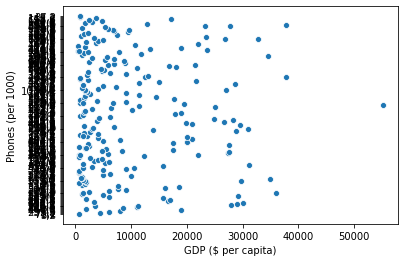

In [5]:
# 산점도 그리기
sns.scatterplot(x='GDP ($ per capita)',y='Phones (per 1000)',data=countries)
plt.show()

- 산점도를 볼 때, 데이터의 관계를 보도록 한다.
 +  해석 요령, 'x'축으로 값이 커질수록 'y'값이 커지는지 작아지는지 확인해본다.
 +  산점도의 점이 어느 곳에 주로 몰려 있는지 확인해본다.

## (2) countplot 그래프

- 설문조사를 진행 후, 각 응답에 따른 비율을 구할 수 있다.

- 거미(Spiders)를 싫어하는가에 대해 리커트 척도를 구한 것이다.

 + 1은 매우 동의 & 5는 매우 비동의를 표한다.
 + 그에 따른 빈도그래프를 countplot으로 작성할 수 있다.

- 기본적으로 막대 그래프로 보여준다.

In [6]:
csv_filepath = 'https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/surveys.csv'
surveys = pd.read_csv(csv_filepath)

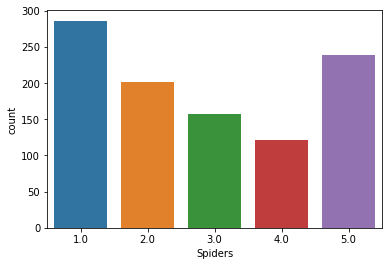

In [7]:
sns.countplot(x = "Spiders", data = surveys)
plt.show()

## (3) 제 3의 변수 추가 - 산점도
- 시각화의 기본은 비교이다.
- 위 (1) & (2) 그래프의 단점은 1차원 또는 2차원적이다.
- 이 때 비교를 하기 위해서는 제 3의 변수를 추가해본다.
 + absences는 결석수를 의미하고, G3는 최종성적을 의미한다.
 + 이 때, location 변수를 추가하여 비교를 보다 쉽게 할 수 있도록 하였다.

In [8]:
url = 'https://raw.githubusercontent.com/chloevan/datasets/master/books/eda_with_python/students.csv'
students = pd.read_csv(url)

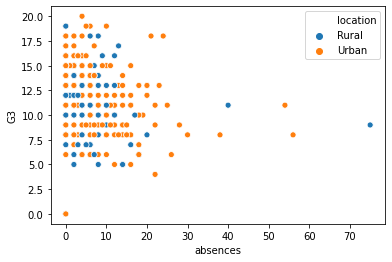

In [9]:
sns.scatterplot(x = "absences", y = "G3", data = students, hue = "location", hue_order = ['Rural', 'Urban'])
plt.show()

## (4) 제 2의 변수 추가 - countplot

- 이번에는 countplot에 location이라는 범수를 추가해본다.
- 이때, location에 각 범주별로 색상을 추가한다.

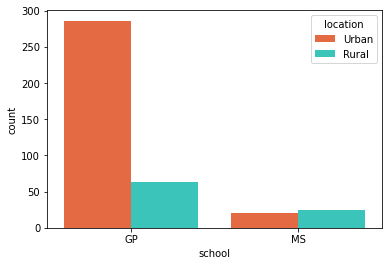

In [10]:
sns.countplot(x = "school", 
              data = students, 
              hue = "location", 
              palette = {
                  "Rural": "#23DBCD", 
                  "Urban": "#FF5C29"
              })
plt.show()

## 그래프 서브그룹 추가 
- 이번에는 그래프를 조금 더 분할해서 살펴본다.
- 우선 study_time의 범주의 개수는 4개이며, 이를 col 형태로 나타날 수 있다.

> 들여쓴 블록


- col 대신에 row형태로 작성해본다.


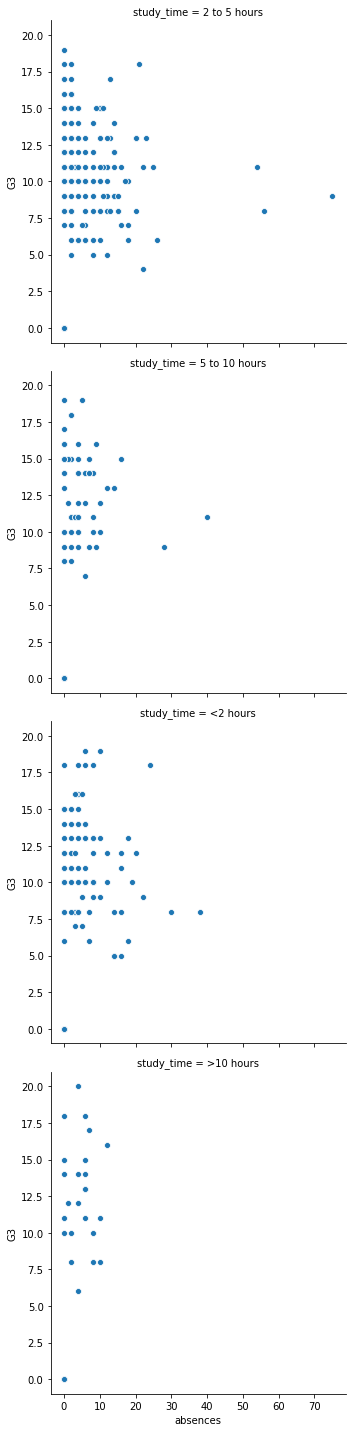

In [13]:
sns.relplot(x="absences",y="G3",
           data=students,
           kind="scatter",
           row="study_time")
plt.show()

- 이번에는 하나의 변수를 더 추가해본다.
- 즉, 총 4개의 변수가 하나의 그래프안에서 표현된 것이다.
- G1은 1학기의 성적을 의미한다.
 + 즉, 1학기의 성적과 최종성적의 상관관계를 표현하는 것이다.
 + 이때, schoolsup은 학교에서 지원을 받은 사람, famsup은 가정에서 교육을 받은 사람 이렇게 범주화 해서 그 차이가 있는지를 확인하는 시각화가 된다. 

- 여기에서도  그룹간의 차이가 있는지를 확인하는 그래프다.

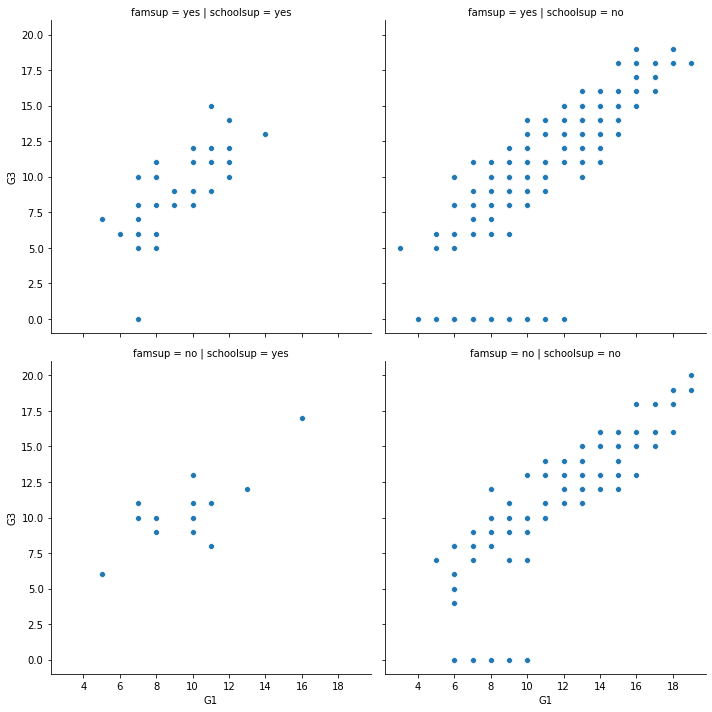

In [16]:
sns.relplot(x="G1",y="G3",
            data=students,
            kind="scatter",
            col="schoolsup",
            col_order=["yes","no"],
            row="famsup",
            row_order=["yes","no"])

plt.show()

## 박스플롯 
- 박스플롯은 기본적으로 수치형~ 범주형 데이터의 조합이다.
- 이때, 두가지를 확인해야 한다.
 + 수치형 데이터의 이상치는 없는가?
 + 각 범주간의 평균의 차이는 없는가?
 

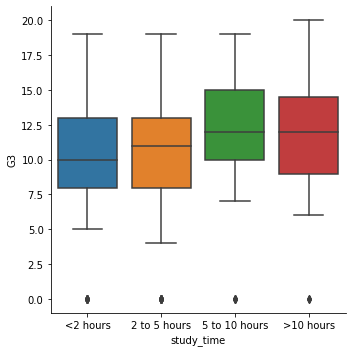

In [18]:
# 시간의 순서대로 리스트 재 범주 
study_time_order=["<2 hours","2 to 5 hours","5 to 10 hours",">10 hours"]
sns.catplot(x='study_time',
            y='G3',
            data=students,
            kind='box',
            order=study_time_order)

plt.show()

- 이번에는 이상치 데이터를 제거해본다.
- 또한, 하나의 변수(=location)을 추가해서 
나타내면 보다 더 의미를 부여할 수 있다.


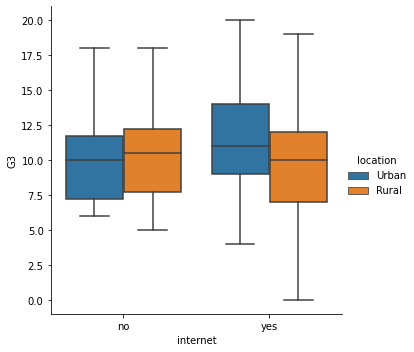

In [20]:
sns.catplot(x='internet',y='G3',
            data=students,
            kind='box',
            hue='location',
            sym='')

plt.show()